In [75]:
import pandas as pd
from numpy import ndarray

In [76]:
train = pd.read_csv('data/train.csv', header=0)
test = pd.read_csv('data/test.csv', header=0)

In this version of the FNN model, we experimented with removing rows completely containg NaN values rather than inputing the values from before.

In [77]:
train['Sex'] = train['Sex'].replace({'male':0})
train['Sex'] = train['Sex'].replace({'female':1})

test['Sex'] = test['Sex'].replace({'male':0})
test['Sex'] = test['Sex'].replace({'female':1})

train_new = train[['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

train_new.dropna(axis=0, inplace=True)
test.dropna(axis=0, inplace=True)


train_X = train_new.drop(['Survived'], axis = 1).to_numpy()
train_y = train_new['Survived'].to_numpy()

test_X = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].to_numpy()



C:\Users\Simon\AppData\Local\Temp\ipykernel_6244\457138545.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new.dropna(axis=0, inplace=True)


In [78]:
from sklearn.model_selection import train_test_split

#Splits data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y ,test_size=0.20)

from sklearn.preprocessing import MinMaxScaler #Used to normalized data

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)



Notes:
-   We use binary_crossentropy as our loss function since we are only perfomring a binary classification and not a multiclass one. 
-   We apply the sigmoid function to map to a value between 0 and 1. 
-   Changing the hyperparameter epochs to a higher values increases model processing time. 

In [79]:
from tensorflow import keras
from keras.models import Sequential

model = Sequential() #Utilized Sequential to go from one layer to the next.

#Input Layer with 6 input neurons
model.add(keras.layers.Dense(3, activation='relu', name='layer1', input_dim=X_train.shape[1]))

#Hidden Layerr
model.add(keras.layers.Dense(2, activation='relu', name='layer2'))

# Extra hidden layers to added to test model performance 
model.add(keras.layers.Dense(3, activation='relu', name='layer4')) 
model.add(keras.layers.Dense(2, activation='relu', name='layer5'))

#Output Layer 
model.add(keras.layers.Dense(1, activation='sigmoid', name='layer3'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/200
29/29 [==============================] - 1s 4ms/step - loss: 0.6425 - accuracy: 0.6042 - val_loss: 0.6313 - val_accuracy: 0.6154
Epoch 2/200
29/29 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.5884 - val_loss: 0.6150 - val_accuracy: 0.6154
Epoch 3/200
29/29 [==============================] - 0s 1ms/step - loss: 0.6095 - accuracy: 0.5884 - val_loss: 0.5982 - val_accuracy: 0.6154
Epoch 4/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.5902 - val_loss: 0.5813 - val_accuracy: 0.6783
Epoch 5/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7075 - val_loss: 0.5705 - val_accuracy: 0.6923
Epoch 6/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5616 - accuracy: 0.7391 - val_loss: 0.5646 - val_accuracy: 0.7133
Epoch 7/200
29/29 [==============================] - 0s 1ms/step - loss: 0.5541 - accuracy: 0.7653 - val_loss: 0.5605 - val_accuracy: 0.7133
Epoch 8/200
2

In [80]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

Observations:
-   When we increase epoch size, the model initially shows signs of pick up patterns well from the training data as the lines are shown to be close to each other initially. The lines then begin to diverge at around 30 epochs which shows signs that the model is starting to overfit. This may indicate that the model is memorizing the trianing data too well which leads to capturing of noise and patterns that don't generalize the new data well.
- Adding more layers seem to increase the occurance of overfitting data. This may possibly mean that our model has more likely picked up on noise and other anomalies unique to the training data set. 

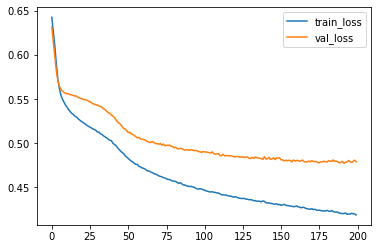

In [81]:
import matplotlib.pyplot as plt
plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

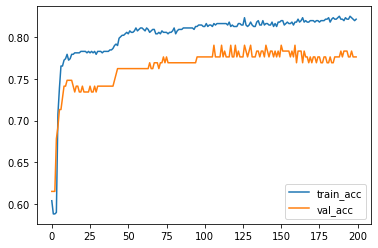

In [82]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

The F1 score and Accuracy score has noticably decreased compared to the prevous version of the FNN model. This helps us realize the impact redcuing the amount of data that is given to train the model has. 

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
predictions = model.predict(X_test)

# Threshold set to convert predictions to binary outputs
threshold = 0.5
predictions = [1 if p >= threshold else 0 for p in predictions]

# Metrics used to evaluate Forward Neural Network Performance
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

5/5 [==============================] - 0s 1ms/step


Accuracy: 0.7762237762237763
Precision: 0.7346938775510204
Recall: 0.6545454545454545
F1 Score: 0.6923076923076923
